In Gambler's Ruin, the agent starts with a dollar amount $\$s$ between $\$1$ and $\$99$.
Each action is a wager between $0$ and $min(s, 100-s)$.
The agent wins each wager with a fixed probability $0.4$.
The state is the agent's dollar amount on hand, and the terminal states are $0$ and $100$.
The reward for every action is $+1$ if the agent reaches $\$100$ (wins a wager of amount $100-s$), and $0$ otherwise.
The task is episodic and $\gamma = 1$.

This code executes Value Iteration:  
Algorithm parameter: a small threshold $\theta > 0$ determining accuracy of estimation.  
Initialize $V(s)$, for all $s \in S+$, arbitrarily except that $V(0) = V(100) = 0$.  
Loop:  
> $\Delta \leftarrow 0$  
> Loop for each $s \in S$:  
> > $v \leftarrow V(s)$  
> > $V(s) \leftarrow \max_a \sum_{s',r} p(s', r|s, a) (r + V(s'))$  
> > $\Delta \leftarrow \max(\Delta, |v − V(s)|$  
until $\Delta < \theta$  
Output a deterministic policy $\pi = \pi_*$, such that  
$\pi(s) = \arg \max_a \sum_{s',r} p(s', r|s, a) (r + V(s'))$  


## Value Iteration for Gambler's Ruin

Reinforcement Learning October 14, 2025


In [83]:
import numpy as np
import matplotlib.pyplot as plt

# theta == threshold
# gamma == discount factor
# p_h = probability of heads

# reward 1 when 100 is reached, 0 otherwise

# actions = [0 to min(s, 100 - s)]


# FIX consider the r value for state 100
MAX_AMOUNT = 100
def value_iteration(p_h=0.4, theta=1e-8, gamma=1):
    # States: 0 to 100
    states = np.arange(1, MAX_AMOUNT)
    V = np.zeros(MAX_AMOUNT + 1)

    policy = np.zeros(MAX_AMOUNT + 1)

    delta = float('inf')
    

    # sweep tracking so that my plot looks similar to the book
    value_sweeps = {}
    sweep_values = [1, 2, 3, 32]
    sweeps = 0

    while delta > theta:
        delta = 0
        sweeps += 1
        
        for s in states:
            actions = np.arange(0, min(s, MAX_AMOUNT - s) + 1) # possible actions
            # print(actions)
            action_values = []

            v_old = V[s] # store old value

            for a in actions:
                # expected return placeholders for V[s+a] and V[s-a]
                win_value = 1 if s + a == MAX_AMOUNT else V[s + a]
                lose_value = V[0] if s - a == 0 else V[s - a]

                val = p_h * (gamma * win_value) + (1 - p_h) * (gamma * lose_value) # bellman optimality equation
                action_values.append(val)

            if len(action_values) > 0:
                V[s] = np.max(action_values) # the max value
                policy[s] = actions[np.argmax(action_values)] # the action that gives the max value

            delta = max(delta, abs(v_old - V[s]))

        if sweeps in sweep_values:
            value_sweeps[sweeps] = V.copy()

    print(f"Converged in {sweeps} sweeps.")
    return V, policy, value_sweeps




Converged in 15 sweeps.


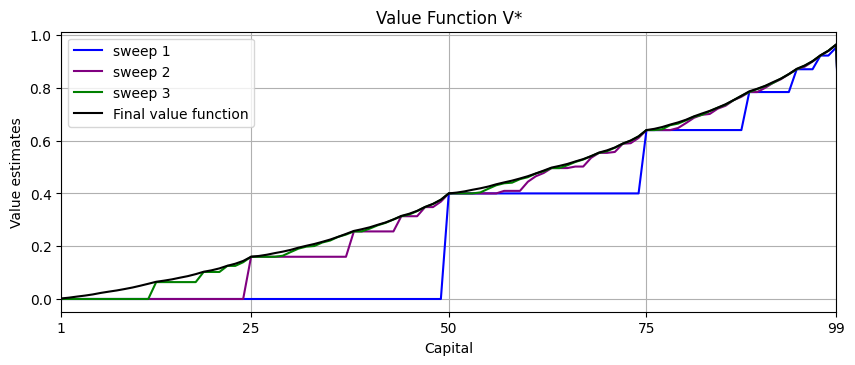

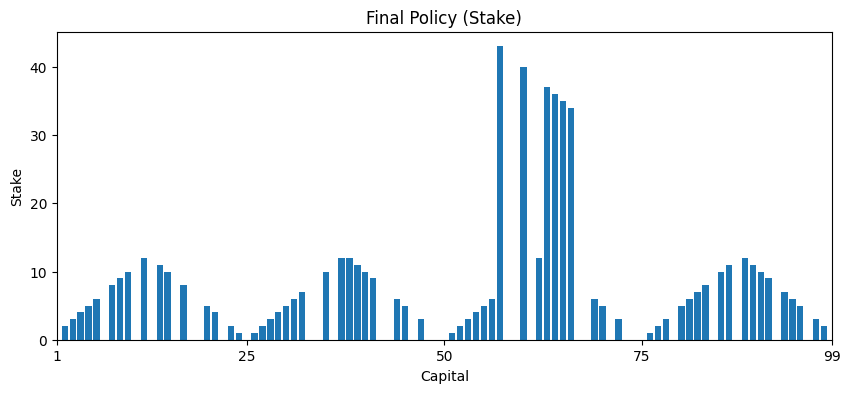

In [86]:
import matplotlib.pyplot as plt

# run value & policy iteration combined in one function
V, policy, value_sweeps = value_iteration()

# Value function plot with sweep values
colors = ['blue', 'purple', 'green', 'yellow']
labels = ['sweep 1', 'sweep 2', 'sweep 3', 'sweep 32']
sweep_values = [1, 2, 3, 32]

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1) 
for i, sweep in enumerate(sweep_values):
    if sweep in value_sweeps:
        plt.plot(value_sweeps[sweep], color=colors[i], label=labels[i])

plt.plot(V, color='black', label='Final value function', linewidth=1.5)
plt.title("Value Function V*")
plt.xlabel("Capital")
plt.xticks([1, 25, 50, 75, 99])
plt.xlim(1, 99)
plt.ylabel("Value estimates")
plt.grid()
plt.legend()

# Policy plot
plt.figure(figsize=(10, 4))
plt.bar(range(101), policy)
plt.title("Final Policy (Stake)")
plt.xlabel("Capital")
plt.xlim(1, 99)
plt.xticks([1, 25, 50, 75, 99])
plt.ylabel("Stake")
plt.show()

#### Parameters - be sure to test on a small state space

In [25]:
MAX_AMOUNT = 10
P = .4
THETA = 0.01
S = range(1,5)

#### Function to update $V(s)$ for each $s \in \{1, \ldots, 100\}$

**Optimization**
This problem is small enough that you can get by with loops instead of numpy vectorization, but it's worth getting practice.
1. When the agent has $\$s$ and wagers $\$a$, the expected return is $0.6*V(s-a) + 0.4*V(s+a)$.
   The updated $V(s)$ is the max of this. You can vectorize this by making
   $V(s-a)$ and $V(s+a)$ into two numpy arrays indexed by $a$. Warning: the indexing can get tricky.
2. If you can further vectorize over the index $s$, more power to you.

In [ ]:
"""
    Optimazing this:
    delta = 0
        for s in range(1, 100):
            actions = range(1, min(s, 100 - s) + 1)
            action_returns = []
            for a in actions:
                win = ph * (1 * (s + a >= 100) + (1 - (s + a >= 100)) * V[s + a])
                lose = (1 - ph) * V[s - a]
                action_returns.append(win + lose)
            new_v = max(action_returns)
            delta = max(delta, abs(new_v - V[s]))
            V[s] = new_v
"""

def update_V(V):
    
    Del = 0.0

    

    return Del

#### Function to calculate the greedy $\pi_*$ from $V(s)$ for each $s \in \{1, \ldots, 100\}$

You can make `update_V()` update the current greedy $\pi$, or you can implement the next function and run it after $V$ has converged.

In [ ]:
def greedy_pi(V):
    pi = np.zeros(100) # initialize to wager 0
    
    return pi

#### Main loop - implements value iteration

In [ ]:
# Initialize V
V = np.zeros(101)

v_sweeps = {}
    
# Update V until Del < THETA
Del = THETA
while Del >= THETA:
    Del = update_V(V)

    
    
# Calculate pi_*



#### Plot $V$ and $\pi_*$


In [88]:
# plot V
# V, policy = value_iteration(p_h=P, theta=THETA, gamma=1)
# plt.plot(V)

# plot pi_*